# Exploración, análisis y limpieza de datos

Este código solo se hará el procesos de explorar, entender los datos y que procesos son necesarios para poder entrenar el modelo probabilístico necesario para predecir la probabilidad de que un cliente incumpla el pago de sus obligaciones.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
sns.set(style="whitegrid")

file_path = "loan//loan.csv"  # Cambia esto por la ruta a tu archivo

# Cargar el archivo CSV

df = pd.read_csv(file_path)


# Mostrar las primeras filas
print("\nPrimeras filas del dataset:\n")
print(df.head())

C:\Users\juan1\AppData\Local\Temp\ipykernel_12500\4184259338.py:12: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Primeras filas del dataset:

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0     

In [4]:
# Resumen de columnas y tipos de datos
print("\nInformación del dataset:\n")
print(df.info())


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               88

La exploración inicial de los datos nos muestra que hay muchísimas variables a tener en cuenta para predecir loan-status, en este caso es necesario reducir la cantidad de variables para solo dejar variables que sean relevantes para el modelo de predicción.

En este caso se empezará por eliminar las variables que tengan un gran numero de valores nulos, estos generan errores y no proporcionan información útil para entrenar un modelo de predicción. 

Se eligió el umbral de 17659 datos nulos, para solo tener variables con un numero muy pequeños de nulos.

In [5]:
# Identificar valores nulos
print("\nValores nulos por columna:\n")
print(df.isnull().sum().sort_values(ascending=False))


Valores nulos por columna:

dti_joint                    886870
annual_inc_joint             886868
verification_status_joint    886868
il_util                      868762
mths_since_rcnt_il           866569
                              ...  
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
out_prncp_inv                     0
Length: 74, dtype: int64


## Eliminar variables nulas

In [4]:
threshold = 17659
df = df.loc[:, df.isnull().sum() < threshold]
print("\nColumnas con más del 25% de valores nulos eliminadas.\n")
print("\nValores nulos por columna:\n")
print(df.isnull().sum().sort_values(ascending=False))



Columnas con más del 25% de valores nulos eliminadas.


Valores nulos por columna:

revol_util                    502
title                         153
collections_12_mths_ex_med    145
last_credit_pull_d             53
earliest_cr_line               29
total_acc                      29
pub_rec                        29
open_acc                       29
inq_last_6mths                 29
delinq_2yrs                    29
acc_now_delinq                 29
annual_inc                      4
total_rec_late_fee              0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
recoveries                      0
funded_amnt_inv                 0
collection_recovery_fee         0
last_pymnt_amnt                 0
funded_amnt                     0
loan_amnt                       0
policy_code                     0
application_type               

In [10]:
print("\nInformación del dataset:\n")
print(df.info())


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          887379 non-null  int64  
 1   member_id                   887379 non-null  int64  
 2   loan_amnt                   887379 non-null  float64
 3   funded_amnt                 887379 non-null  float64
 4   funded_amnt_inv             887379 non-null  float64
 5   term                        887379 non-null  object 
 6   int_rate                    887379 non-null  float64
 7   installment                 887379 non-null  float64
 8   grade                       887379 non-null  object 
 9   sub_grade                   887379 non-null  object 
 10  home_ownership              887379 non-null  object 
 11  annual_inc                  887375 non-null  float64
 12  verification_status         887379 non-null  

## Eliminación de variables no útiles para el modelo de predicción.

Se han reducido la cantidad de variables de manera considerable, desde 73 variables hasta 45 variables, esto es una buena depuración inicial, pero es necesario tomar más características en cuenta para depurar los datos relevantes y tambien para que este modelo pueda ser usado de manera práctica, ya que se busca que sea utilizado desde una pagina web, y para los usuarios no sería cómodo tener que recolectar tantos datos distintos para tener que ingresarlos de manera manual a la pagina.

En este caso se ha separado las variables que no se consideran útiles para el modelo predictivo, esto en 2 razones claras y bien diferenciadas, la primera son las variables que no tienen una relación aparente con la capacidad del prestatario para predecir la posibilidad de pago  futura, la segunda son las variables que ofrecen información duplicada o derivadas de otras más relevantes.

In [5]:
#Lista de variables que no aportan información
V_No_Util=["initial_list_status","recoveries","total_rec_late_fee","total_rec_int","total_rec_prncp","total_pymnt_inv","total_pymnt","funded_amnt","funded_amnt_inv","member_id","title","url","issue_d","last_credit_pull_d","zip_code","collection_recovery_fee","recoveries","out_prncp","out_prncp_inv","last_pymnt_amnt","addr_state","pymnt_plan","policy_code"]

In [5]:
# Comprobación de la existencia de columnas
def check_columns_existence(df, columns_to_check):
    """
    Comprueba la existencia de columnas en el DataFrame.

    Args:
        df (pd.DataFrame): DataFrame en el que se comprobarán las columnas.
        columns_to_check (list): Lista de nombres de columnas a comprobar.

    Returns:
        dict: Diccionario con el nombre de la columna y un booleano indicando su existencia.
    """
    existence = {col: col in df.columns for col in columns_to_check}
    return existence


existence = check_columns_existence(df, V_No_Util)
print("\nExistencia de columnas:")
for col, exists in existence.items():
    print(f"{col}: {'Presente' if exists else 'No presente'}")


Existencia de columnas:
initial_list_status: Presente
recoveries: Presente
total_rec_late_fee: Presente
total_rec_int: Presente
total_rec_prncp: Presente
total_pymnt_inv: Presente
total_pymnt: Presente
funded_amnt: Presente
funded_amnt_inv: Presente
member_id: Presente
title: Presente
url: Presente
issue_d: Presente
last_credit_pull_d: Presente
zip_code: Presente
collection_recovery_fee: Presente
out_prncp: Presente
out_prncp_inv: Presente
last_pymnt_amnt: Presente
addr_state: Presente
pymnt_plan: Presente
policy_code: Presente


In [6]:
# Eliminación de columnas
df = df.drop(columns=V_No_Util, errors='ignore')

In [7]:
print("\nInformación del dataset:\n")
print(df.info())


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          887379 non-null  int64  
 1   loan_amnt                   887379 non-null  float64
 2   term                        887379 non-null  object 
 3   int_rate                    887379 non-null  float64
 4   installment                 887379 non-null  float64
 5   grade                       887379 non-null  object 
 6   sub_grade                   887379 non-null  object 
 7   home_ownership              887379 non-null  object 
 8   annual_inc                  887375 non-null  float64
 9   verification_status         887379 non-null  object 
 10  loan_status                 887379 non-null  object 
 11  purpose                     887379 non-null  object 
 12  dti                         887379 non-null  

## Evaluación de dispersión, valores atípicos, balance y rango de valores de las variables

Ahora que se han disminuido a solo variables que pueden ser útiles para predecir variables, pero es necesario evaluar mas detalles para asegurarse si son útiles y que hay que tener en cuenta para ser utilizadas para entrenar el modelo de predicción de probabilístico

In [8]:
# Conteo de valores únicos por columna
print("\nValores únicos por columna:\n")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} valores únicos")


Valores únicos por columna:

id: 887379 valores únicos
loan_amnt: 1372 valores únicos
term: 2 valores únicos
int_rate: 542 valores únicos
installment: 68711 valores únicos
grade: 7 valores únicos
sub_grade: 35 valores únicos
home_ownership: 6 valores únicos
annual_inc: 49384 valores únicos
verification_status: 3 valores únicos
loan_status: 10 valores únicos
purpose: 14 valores únicos
dti: 4086 valores únicos
delinq_2yrs: 29 valores únicos
earliest_cr_line: 697 valores únicos
inq_last_6mths: 28 valores únicos
open_acc: 77 valores únicos
pub_rec: 32 valores únicos
revol_bal: 73740 valores únicos
revol_util: 1356 valores únicos
total_acc: 135 valores únicos
collections_12_mths_ex_med: 12 valores únicos
application_type: 2 valores únicos
acc_now_delinq: 8 valores únicos


Ahora de va a ver la distribución y el balance de los datos, esto es importante para ver la utilidad o los problemas que pueden generar los datos para ser usados en el modelo probabilístico.

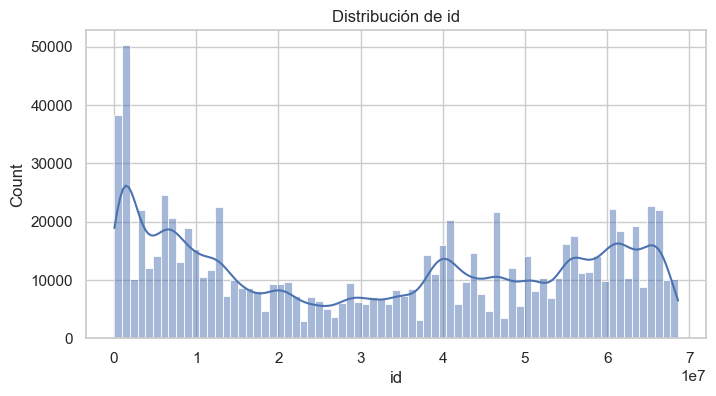

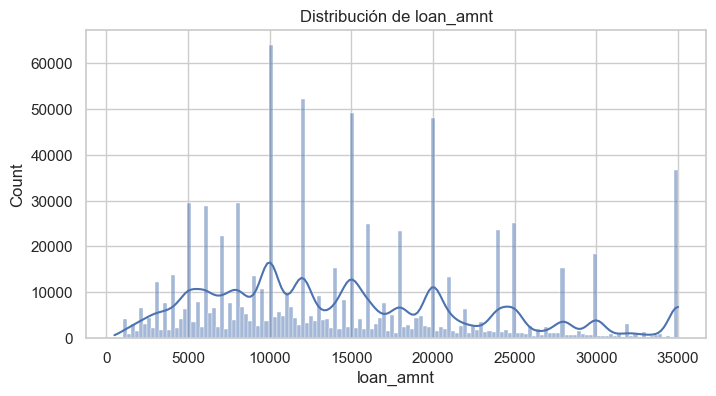

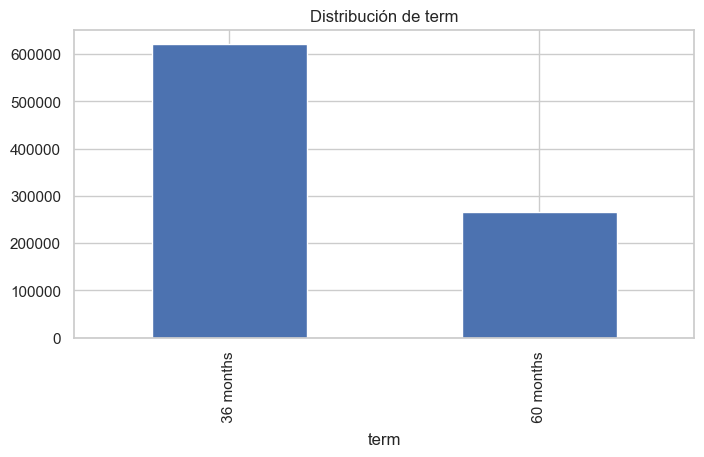

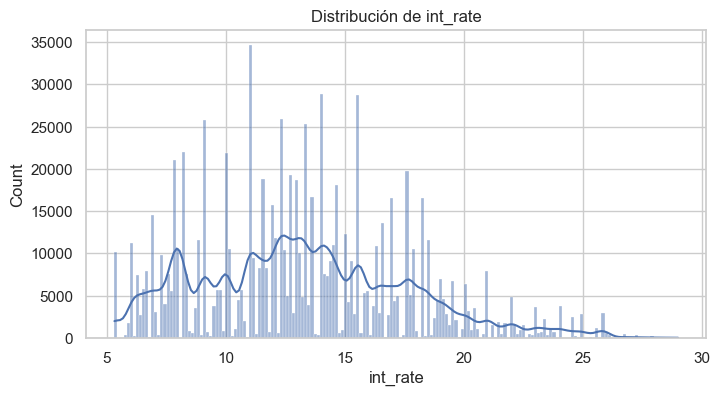

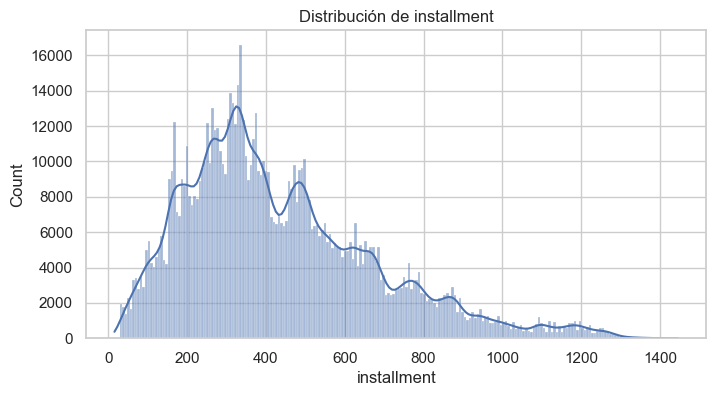

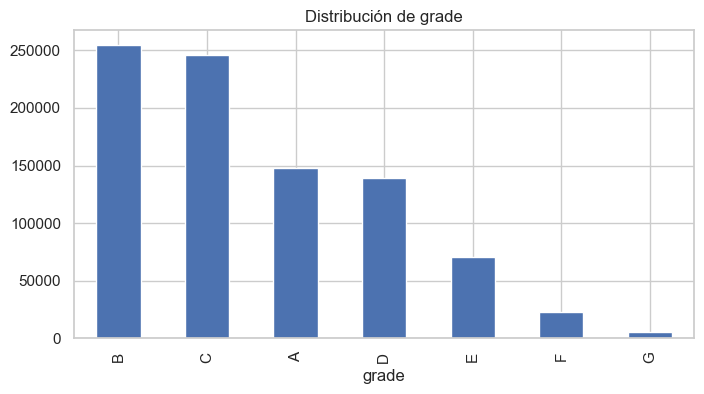

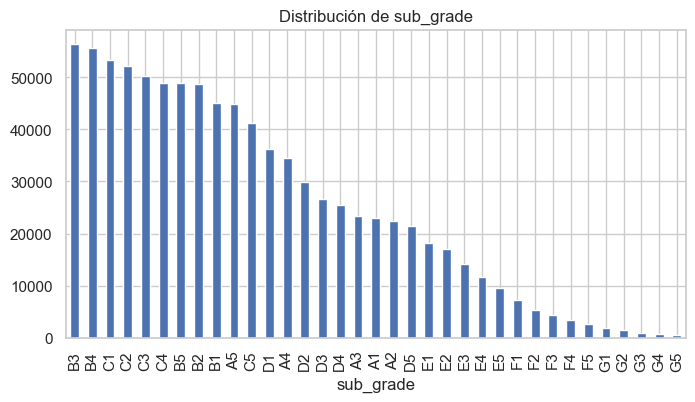

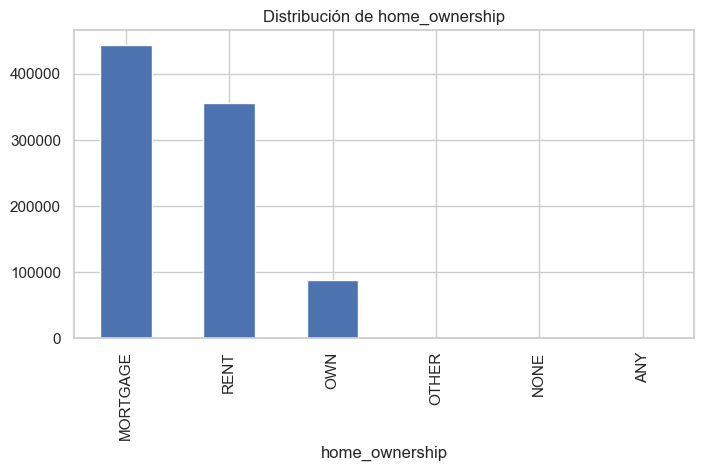

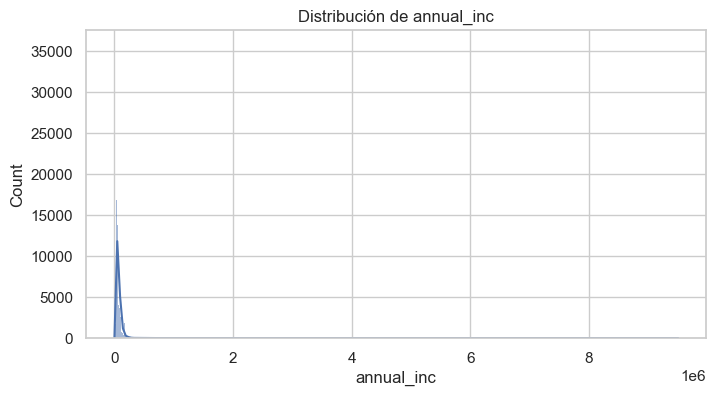

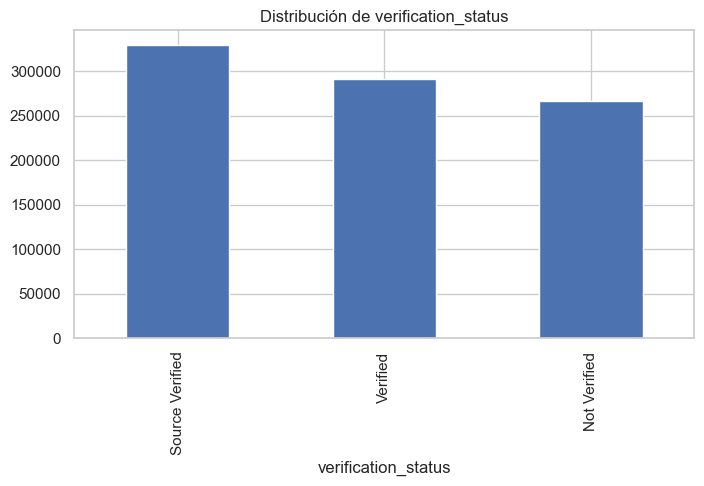

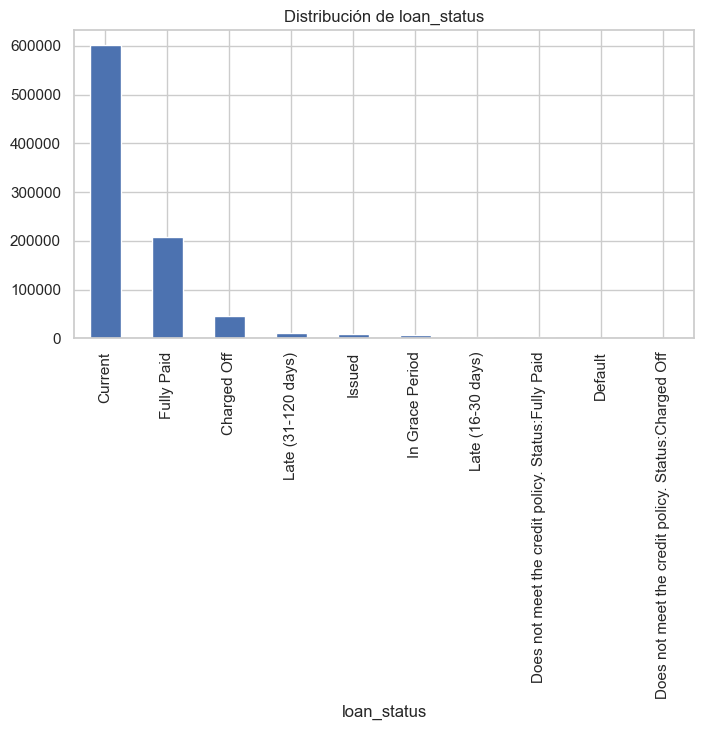

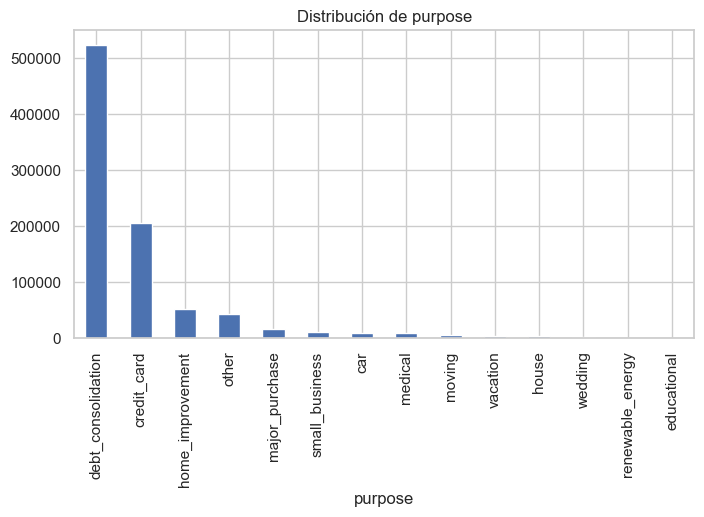

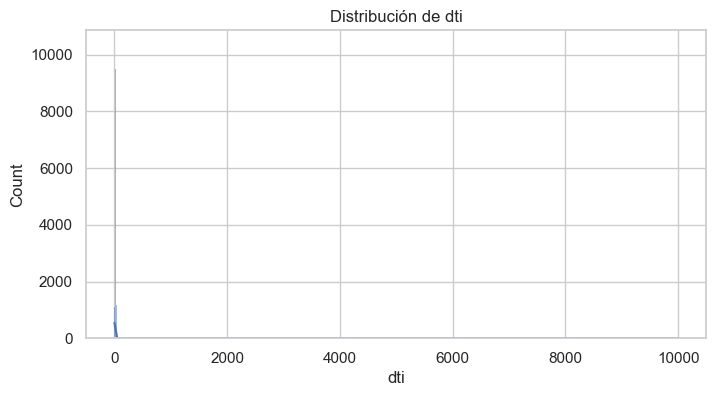

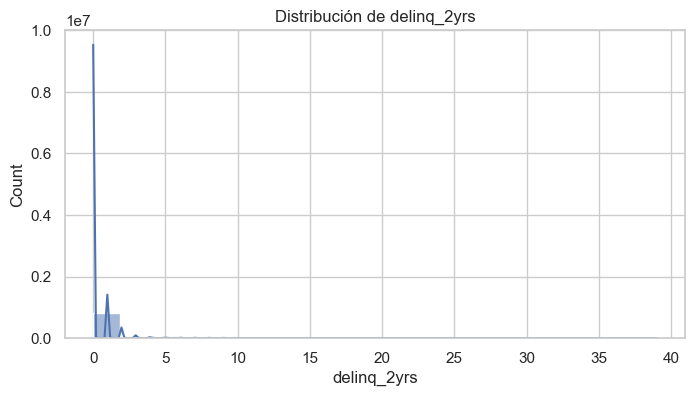

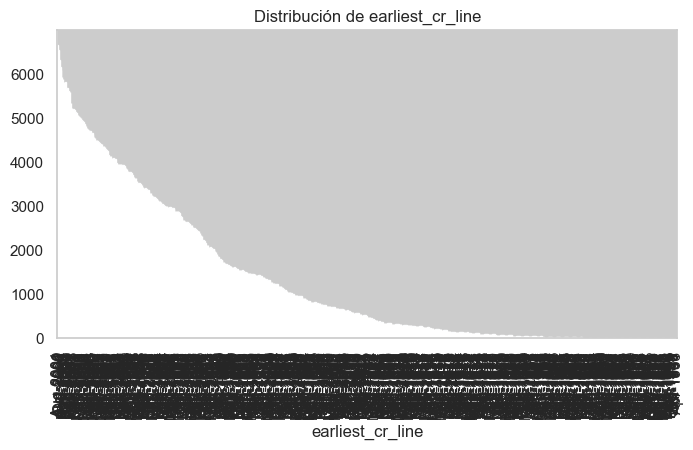

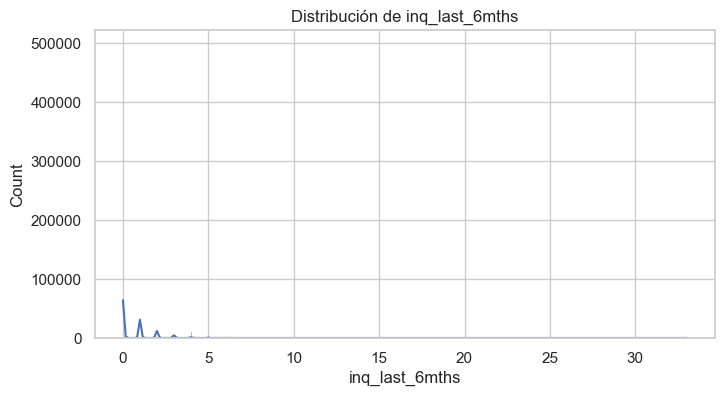

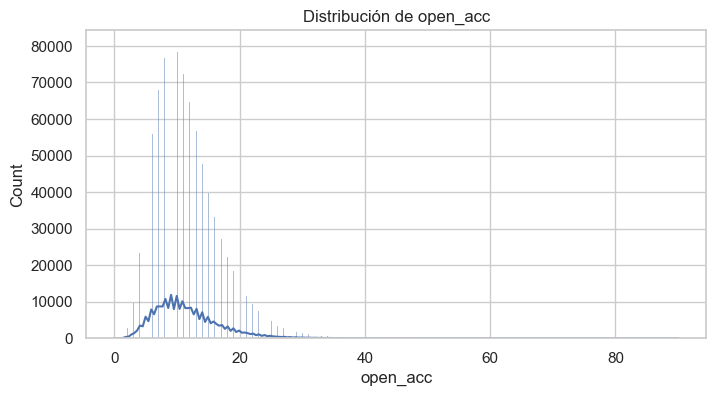

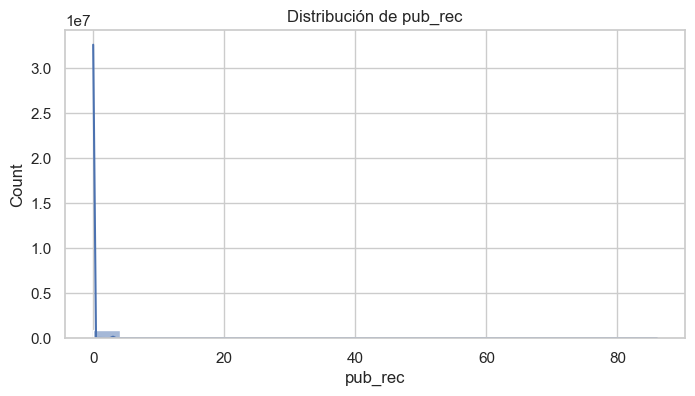

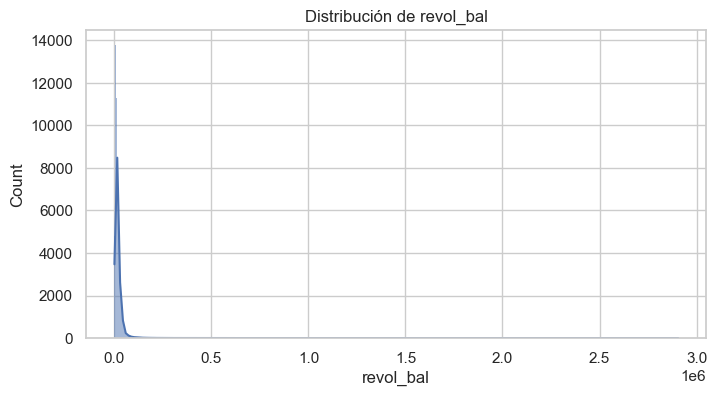

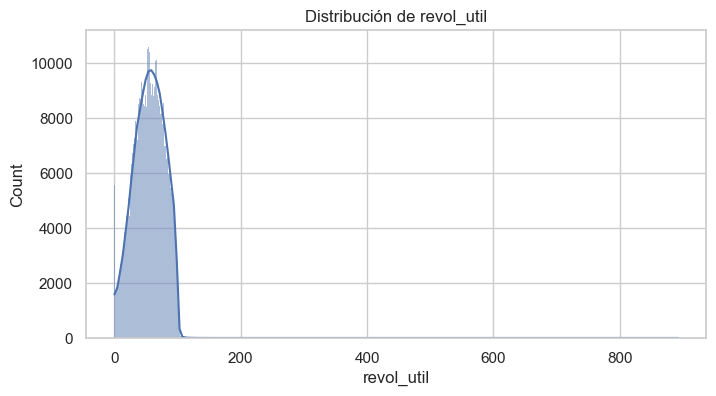

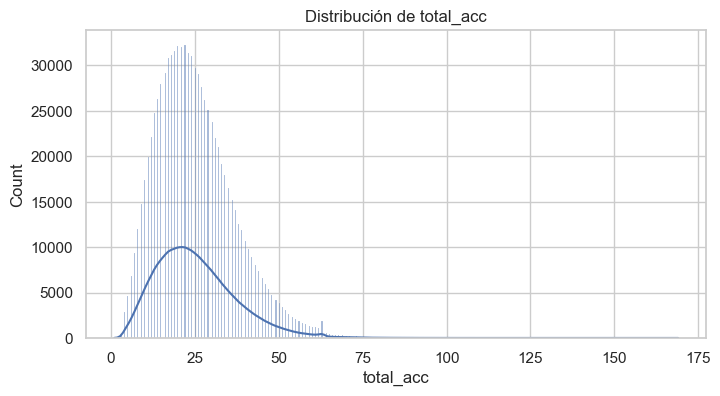

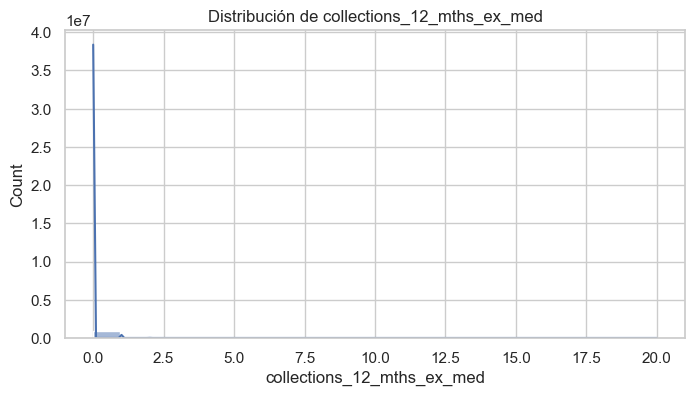

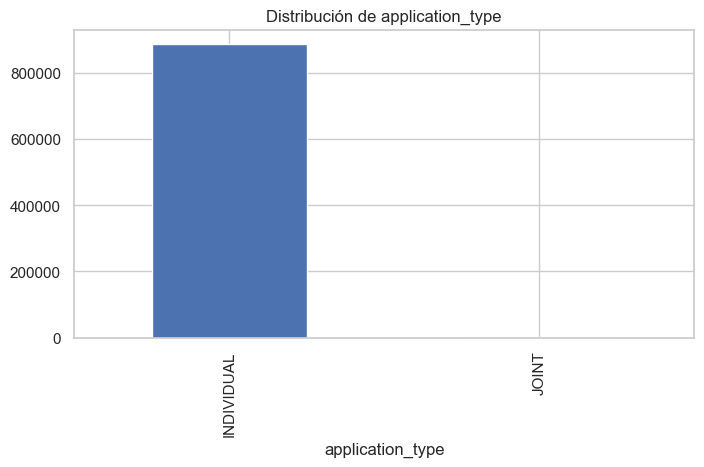

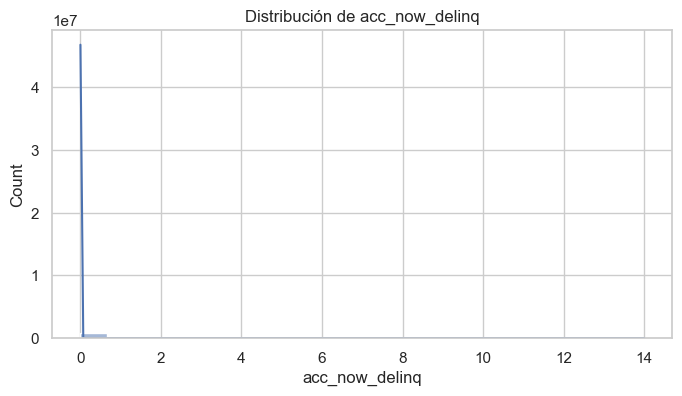

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# ...existing code...

for col in df.columns:
    plt.figure(figsize=(8,4))
    if df[col].dtype == "object":
        df[col].value_counts().plot(kind='bar')
    else:
        sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

Como se puede ver existen distintas situaciones en cada una de las variables, unas variables están bastante balanceados, otras, aunque tengan desbalances no implica un problema para entrenar el modelo, pero tambien hay variables que tienen problemas que hacen que no sean utilizables.

Empecemos por la variable home ownership, esta tiene claros desbalances, en la cual solo 2 valores tienen un numero representativo, el tercero tiene una muestra mucho mas pequeña y el resto no tiene una muestra representativa, en este caso es necesario una disminución de opciones y un balanceo, ya que aun tiene una representación suficiente para ser utilizado y su representación (sus valores más importantes preguntan si tiene una casa propia, está alquilando o tiene una hipoteca), tiene una gran importancia para el análisis financiero de una persona.
Para la variable purpose pasa el mismo problema que el anterior caso, en donde hay un claro desbalance de clases, en este caso es peor, existe una clase con una representación muy grande y el resto de las clases tiene una representación baja, por ahora se mantendrá ya que tiene una importancia clara ya que representa la razón del préstamo, será necesario probar su relevancia en el modelo probabilístico.

Aplication type será eliminado, esta variable solo representa si el préstamo se presentó en conjunto o en grupo, y al ver que no hay una muestra representativa de prestamos en conjunto, significando que no es una variable representativa para una predicción clara.

Ahora para las variables continuas se pueden notar que la mayoría tienen una formación hacia la derecha pero no tienen señales notables de ser generadoras de ruido en la red neuronal, ciertas variables son necesarias utilizar otra graficas e información para concluir si son o no útiles ya que la gráfica generada está muy concentrada en puntos específicos, para ser especifico las variables anual_inc ,dti ,delinq_2yrs ,inq_last_6mths ,pub_rec ,revol_bal ,collections_12_mths_ex_med y acc_now_delinq.


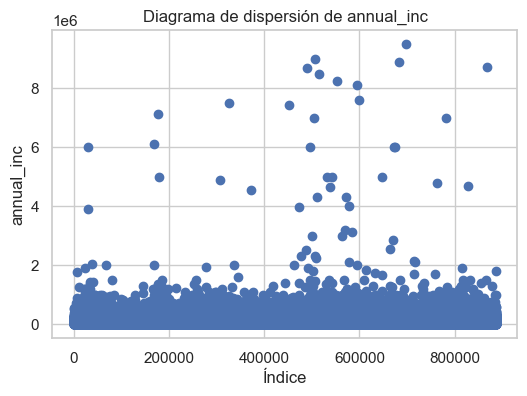

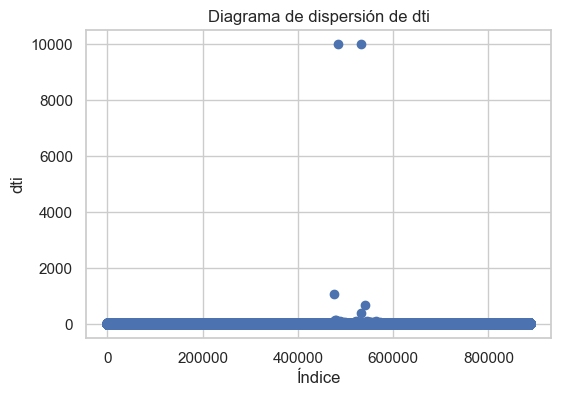

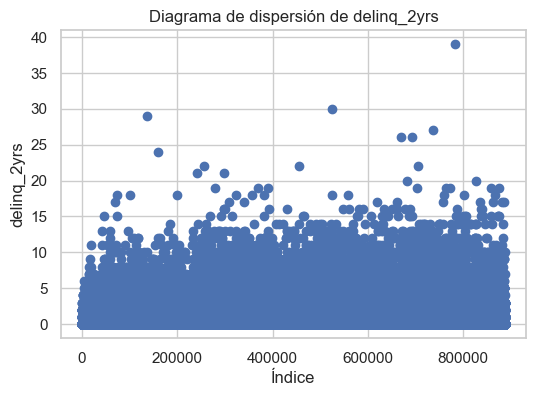

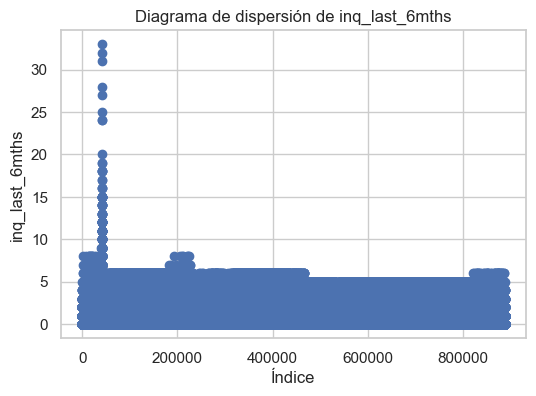

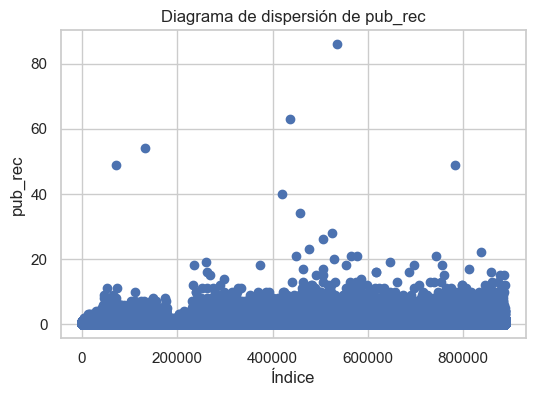

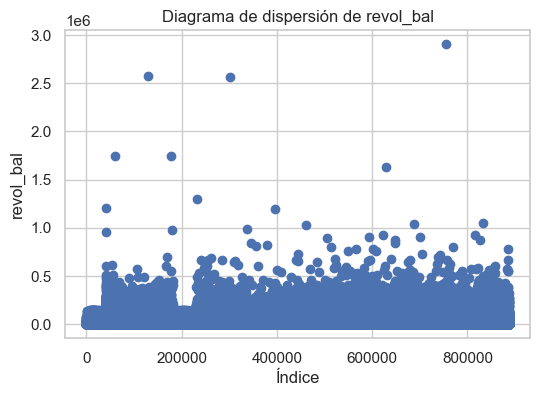

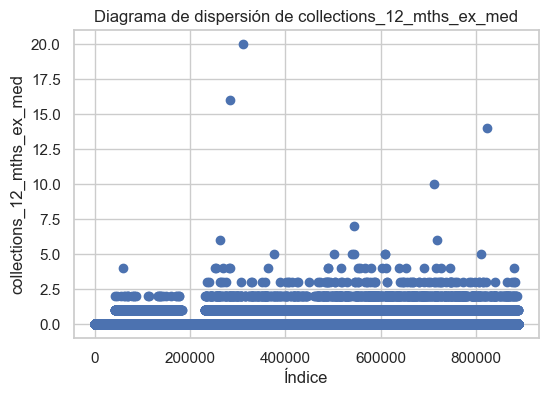

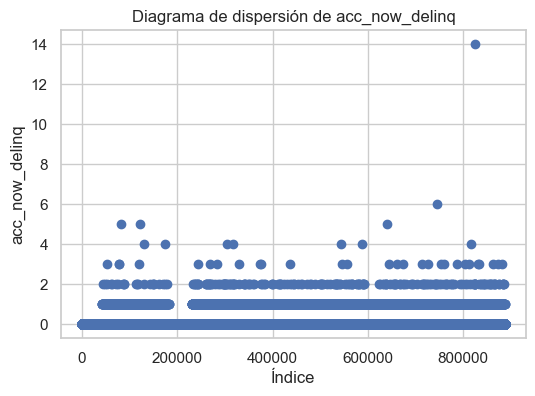

In [36]:
columns_to_plot = [
    "annual_inc",
    "dti",
    "delinq_2yrs",
    "inq_last_6mths",
    "pub_rec",
    "revol_bal",
    "collections_12_mths_ex_med",
    "acc_now_delinq"
]
for col in columns_to_plot:
    plt.figure(figsize=(6,4))
    plt.scatter(df.index, df[col])
    plt.title(f"Diagrama de dispersión de {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.show()

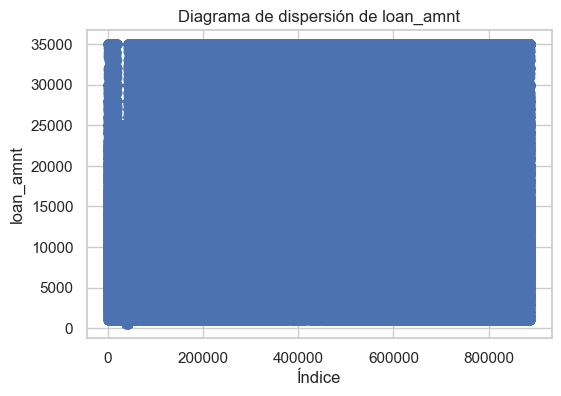

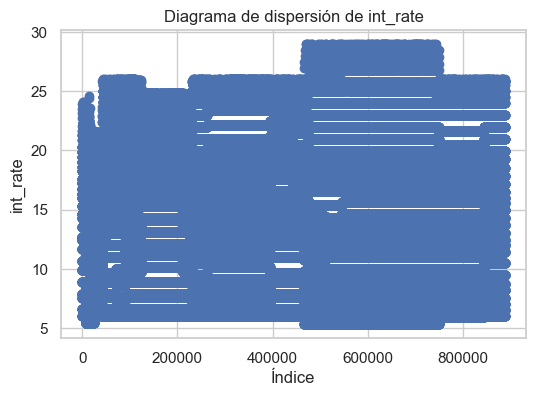

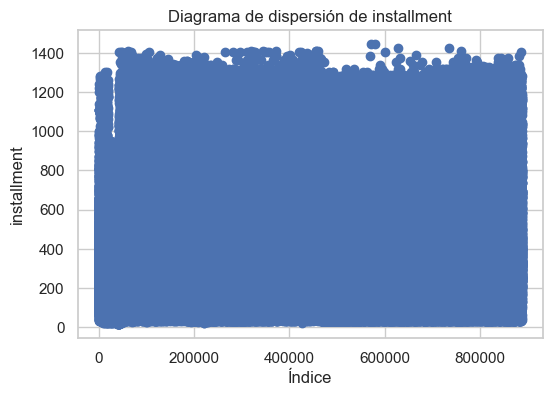

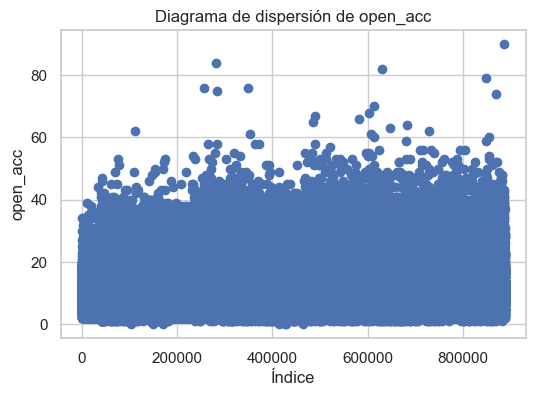

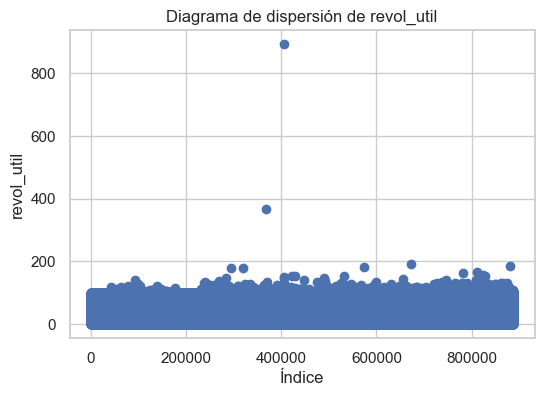

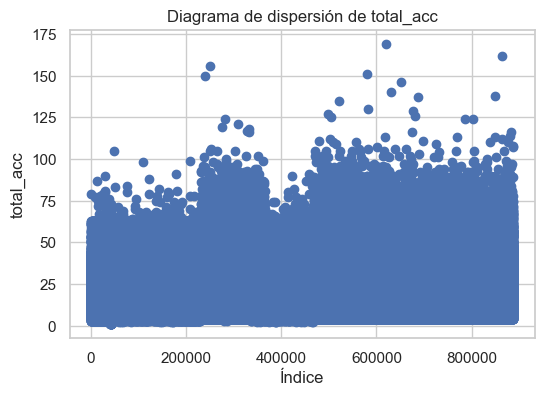

In [6]:
columns_to_plot = [
    "loan_amnt",
    "int_rate",
    "installment",
    "open_acc",
    "revol_util",
    "total_acc"
]

for col in columns_to_plot:
    plt.figure(figsize=(6,4))
    plt.scatter(df.index, df[col])
    plt.title(f"Diagrama de dispersión de {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.show()

Al mirar las variables continuas que generaban desconcierto se pueden ver que tienen más dispersión que las variables continuas que tenían una distribución un poco mas uniforme, en este caso lo mejor será disminuir los valores atípicos para disminuir la dispersión y que esto no genere ruido en la red neuronal.

In [8]:
import numpy as np

columns_to_plot = [
    "annual_inc",
    "dti",
    "delinq_2yrs",
    "inq_last_6mths",
    "pub_rec",
    "revol_bal",
    "collections_12_mths_ex_med",
    "open_acc",
    "revol_util",
    "total_acc"
]

# Eliminación de outliers
for col in columns_to_plot:
    lower_q = df[col].quantile(0.01)
    upper_q = df[col].quantile(0.99)
    df = df[(df[col] >= lower_q) & (df[col] <= upper_q)]

df = df.drop(columns="application_type", errors='ignore')

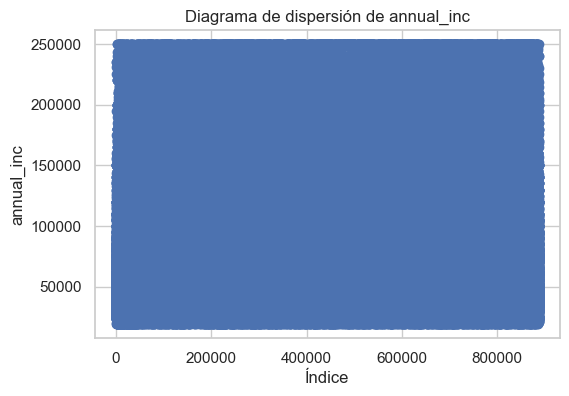

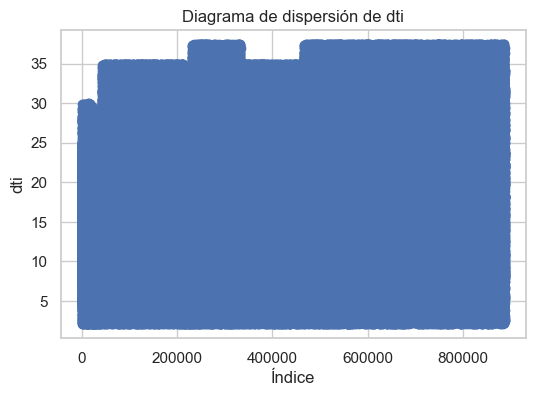

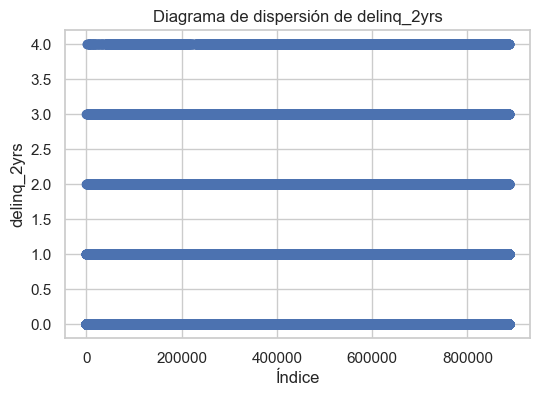

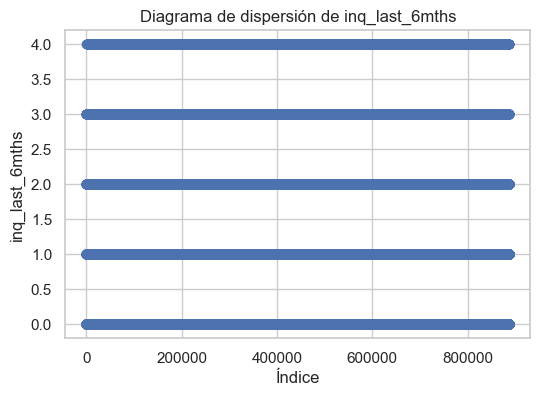

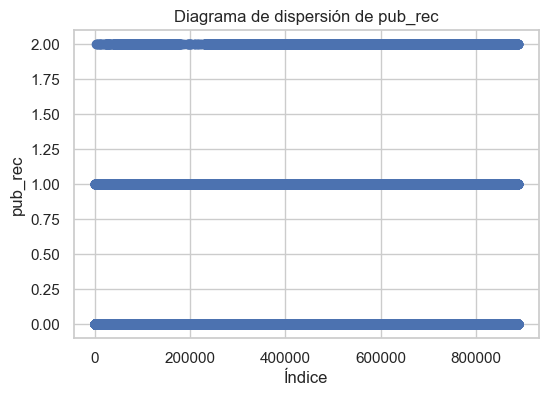

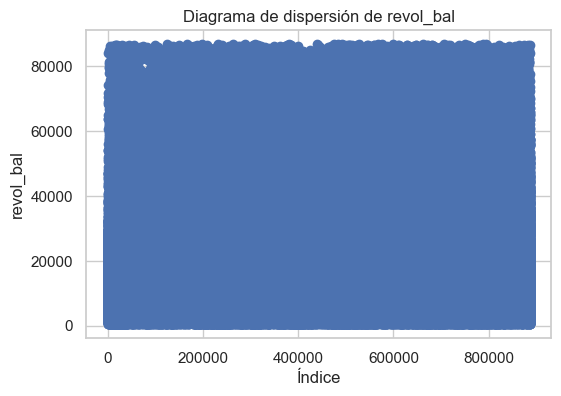

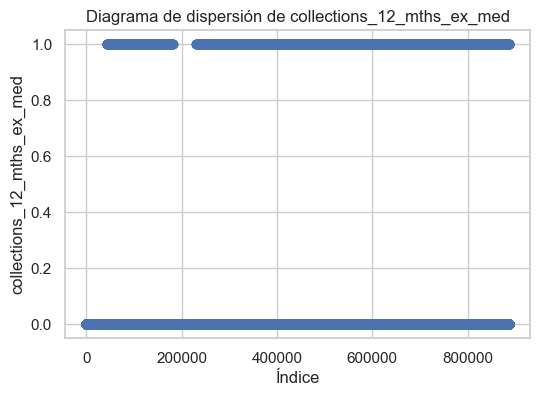

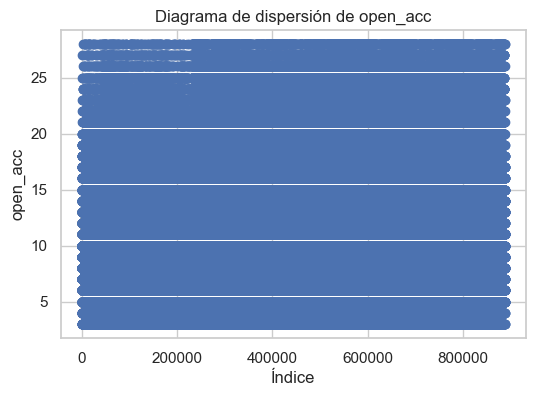

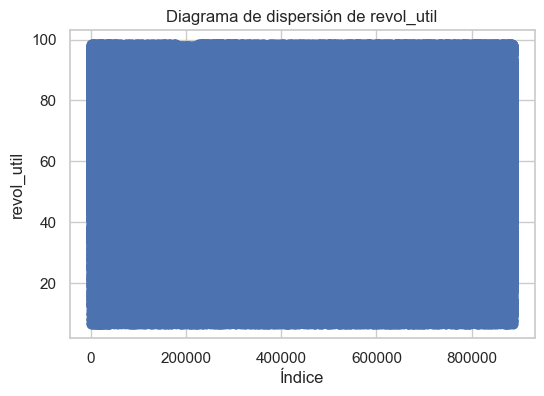

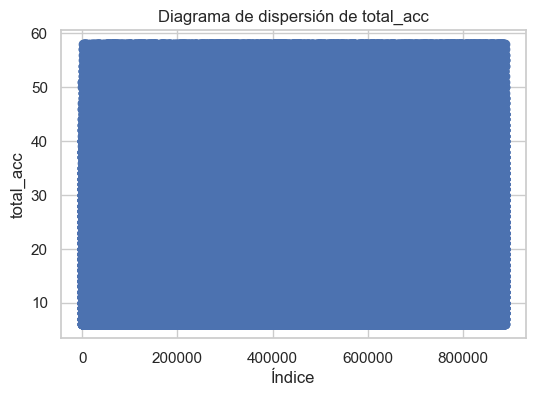

In [51]:
for col in columns_to_plot:
    plt.figure(figsize=(6,4))
    plt.scatter(df.index, df[col])
    plt.title(f"Diagrama de dispersión de {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.show()

In [9]:
# Eliminación de filas con valores nulos
df = df.dropna()

## Analizar correlación

In [9]:
# Correlaciones de las variables con la variable objetivo
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

corr_matrix = df.corr()
loan_corr = corr_matrix["loan_status"].sort_values(ascending=False)
print(loan_corr)

loan_status                   1.000000
inq_last_6mths                0.073319
purpose                       0.041105
int_rate                      0.035617
total_acc                     0.009236
home_ownership                0.002869
earliest_cr_line              0.000785
annual_inc                   -0.005035
verification_status          -0.007781
acc_now_delinq               -0.009047
sub_grade                    -0.011516
grade                        -0.011717
revol_util                   -0.015193
collections_12_mths_ex_med   -0.022494
delinq_2yrs                  -0.026743
pub_rec                      -0.029370
installment                  -0.032071
open_acc                     -0.039787
revol_bal                    -0.041241
loan_amnt                    -0.067830
dti                          -0.083552
term                         -0.099645
id                           -0.345074
Name: loan_status, dtype: float64


Correlaciones Positivas Significativas: Las variables que muestran una correlación positiva con loan_status son:
•	inq_last_6mths (0.073): Esta es la correlación positiva más fuerte, sugiriendo que un mayor número de consultas crediticias en los últimos 6 meses está asociado con una mayor probabilidad de predecir la posible situación de la persona que realiza la petición del préstamo
•	purpose (0.041): El propósito del préstamo muestra una correlación positiva moderada.
•	int_rate (0.036): La tasa de interés tiene una correlación positiva débil.
•	total_acc (0.009): El número total de cuentas muestra una correlación positiva muy débil.
Correlaciones Negativas Significativas: Las correlaciones negativas más fuertes son:
•	term (-0.100): La duración del préstamo muestra la correlación negativa más fuerte, sugiriendo que tiene una relación considerable para predecir a loan_status.
•	dti (-0.084): La relación deuda-ingreso presenta una correlación negativa considerable.
•	loan_amnt (-0.068): El monto del préstamo muestra una correlación negativa moderada.
Variables con Correlaciones Débiles: Varias variables muestran correlaciones muy débiles (cercanas a cero), incluyendo:
•	home_ownership (0.003)
•	earliest_cr_line (0.001)
•	application_type (-0.004)
•	annual_inc (-0.005)
Implicaciones para el Modelado:
1.	Las variables con correlaciones más fuertes (term, dti, loan_amnt, inq_last_6mths) deberían ser consideradas prioritarias en el modelo predictivo.
2.	Las variables con correlaciones muy débiles podrían ser evaluadas para su posible exclusión del modelo, aunque es importante considerar que podrían tener relaciones no lineales importantes.
3.	La presencia de correlaciones tanto positivas como negativas sugiere que el problema requiere un modelo que pueda capturar estas relaciones bidireccionales.
Aunque esta prueba es relevantes es importante aclarar que solo evalúa relaciones lineales, por consiguiente no significa que las variables con correlaciones bajas sean inútiles, sino que su evaluación en el modelo de predicción es importante para visualizar posibles patrones no lineales que permitirían ser útiles para la predicción.


In [10]:
column_names = df.columns.tolist()
print(column_names)

['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq']


Despues de toda la exploración y limpieza de datos ahora tenemos las variables finales para entrenar el modelo de predicción, aunque es importante tener en cuenta que en la siguiente fase puede darse la eliminación de más variables, esto claro de acuerdo a las posibilidades del proyecto y la utilidad de predicción que tengan con el modelo.

In [11]:
df.to_csv("Base_datos_Entrenamiento.csv", index=False)